In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import f1_score
from sklearn.linear_model import Perceptron as pc

# Data 

In [4]:
drug_data = pd.read_csv('drug200.csv')

drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


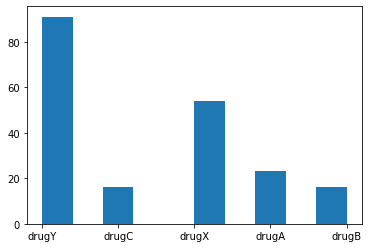

In [5]:
# Need to add axis labels and title

x = plt.hist(drug_data.Drug)
plt.savefig('Drug_Distribution_Data.pdf')

In [6]:
N_to_K = drug_data.Na_to_K
Age = drug_data.Age
Sex_nf = pd.get_dummies(drug_data.Sex)
BP_nf = pd.Categorical(drug_data.BP, ordered = True, categories = ['LOW', 'NORMAL', 'HIGH'])
Chol_nf = pd.Categorical(drug_data.Cholesterol, ordered = True, categories = ['NORMAL', 'HIGH'])
BP_nf = pd.DataFrame({'BP': BP_nf.codes})
Chol_nf = pd.DataFrame({'Cholesterol' :Chol_nf.codes})

In [7]:
drug_features = [Age, Sex_nf, BP_nf, Chol_nf, N_to_K]
drug_features = pd.concat(drug_features, axis=1, join = 'inner')
drug_target = drug_data.Drug

In [8]:
x_train, x_test, y_train, y_test = sk.train_test_split(drug_features, drug_target)
y_train = y_train.to_numpy()

# Guassian Naive-Bayes

In [9]:
cl_gnb = gnb().fit(x_train, y_train)

In [10]:
cl_gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [24]:
predictions_cl_gnb = cl_gnb.predict(x_train).reshape(150, 1)
index = x_train.index.values.reshape(150, 1)
targets_cl_gnb = y_train.reshape(150, 1)

#predicitons_cl_gnb = k.reshape(150, 1)
predictions_targets = np.concatenate((index, predictions_cl_gnb, targets_cl_gnb), axis =1)      

array([[135, 'drugX', 'drugX'],
       [136, 'drugB', 'drugB'],
       [22, 'drugY', 'drugY'],
       [124, 'drugB', 'drugB'],
       [130, 'drugY', 'drugY'],
       [10, 'drugC', 'drugC'],
       [114, 'drugX', 'drugX'],
       [39, 'drugX', 'drugX'],
       [169, 'drugA', 'drugA'],
       [175, 'drugB', 'drugY'],
       [57, 'drugY', 'drugY'],
       [62, 'drugY', 'drugY'],
       [121, 'drugA', 'drugY'],
       [115, 'drugA', 'drugY'],
       [34, 'drugX', 'drugX'],
       [42, 'drugY', 'drugY'],
       [128, 'drugY', 'drugY'],
       [186, 'drugB', 'drugB'],
       [181, 'drugX', 'drugX'],
       [140, 'drugA', 'drugA'],
       [20, 'drugY', 'drugY'],
       [95, 'drugX', 'drugX'],
       [31, 'drugB', 'drugB'],
       [102, 'drugC', 'drugC'],
       [45, 'drugX', 'drugX'],
       [58, 'drugX', 'drugX'],
       [48, 'drugY', 'drugY'],
       [172, 'drugY', 'drugY'],
       [106, 'drugX', 'drugX'],
       [131, 'drugY', 'drugY'],
       [153, 'drugX', 'drugX'],
       [178, 'drugY',

In [131]:
# Accuracy

def accuracy_model(pt):
    error_count = 0
    for i in range(len(pt)):
        if pt[i][1] != pt[i][2]:
            error_count=error_count+1
    
    return 1-error_count/len(pt)

## Check To make sure its accurate

def accuracy_class(pt):
    count = 0
    class_accuracy = {}
    error_count = 0
    classes = list(set(predictions_targets[:, 2]))
    for i in range(len(classes)):
        for j in range(len(pt)):
            if pt[j, 1] == classes[i]:
                  count = count +1
            if pt[j, 1] == classes[i] and  pt[j, 1] != pt[j, 2]:
                error_count = error_count+1
        class_accuracy[classes[i]] = (count - error_count)/count
        count = error_count = 0
    return class_accuracy


 k = accuracy_class(predictions_targets)


{'drugC': 0.6363636363636364,
 'drugB': 0.8461538461538461,
 'drugY': 1.0,
 'drugX': 1.0,
 'drugA': 0.68}

# Decision Tree

In [9]:
cl_dtc = dtc().fit(x_train, y_train)

In [10]:
k = dtc.predict(x_train)

In [11]:
p = x_train.index.values
j = y_train.reshape(150, 1)
p = p.reshape(150, 1)
k = k.reshape(150, 1)
l = np.concatenate((p, k, j), axis =1)

In [12]:
dtc.score(x_train, y_train)

1.0

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc,
    out_file = "testTree.pdf",
    feature_names = list(x_train.columns),
    class_names = y_train
)

# Top- DT

In [21]:
dtc2 = dtc()
dtc2.get_params()
#f1_score(y_true, y_pred, average='weighted')
params = {'criterion': ['entropy', 'gini'], 'max_depth' : [1, 2, 3, 4, 5, 3, 7 ], 'min_samples_split': [2, 3, 4]}
sc = sk.GridSearchCV(dtc2, params, scoring='f1_weighted')

In [22]:
sc.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 3, 7],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [23]:
sc.best_score_

0.9925925925925926

In [24]:
sc.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}

In [25]:
j=np.concatenate((sc.predict(x_train).reshape(150, 1), k.reshape(150, 1)), axis =1)
j.shape

j[1][1]

'drugA'

In [26]:
for i in range(len(j)):
    if j[i, 1] != j[i, 0]:
        print(j[i])

# Perceptron

In [54]:
pcc = pc()

z = x_train.to_numpy()

In [55]:
pcc.fit(x_train, y_train)

Perceptron()

In [56]:
pcc.score(x_train, y_train)

0.5133333333333333